In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.Load and inspect the data

In [ ]:
df=pd.read_csv("/content/Bengaluru_House_Data (1).csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


## 2.Understand the data types and summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Data cleaning

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.drop("society",axis=1,inplace=True)

In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [ ]:
df.dropna(subset=["location"],inplace=True)

In [ ]:
df.dropna(subset=["size"],inplace=True)

In [ ]:
df["bath"].unique()  #discret ann so median use akilla mode vech

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [ ]:
df["bath"].fillna(df["bath"].mode()[0],inplace=True)

/tmp/ipython-input-1806779362.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bath"].fillna(df["bath"].mode()[0],inplace=True)


In [ ]:
df["balcony"].unique()   #discret so mode vech use akaam

array([ 1.,  3., nan,  2.,  0.])

In [ ]:
df["balcony"].fillna(df["balcony"].mode()[0],inplace=True)

/tmp/ipython-input-2919493036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["balcony"].fillna(df["balcony"].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


## checking if in this dataset exists duplicates or not

In [ ]:
df.duplicated().sum()

np.int64(569)

In [ ]:
df.shape

(13303, 8)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(12734, 8)

## Visualization

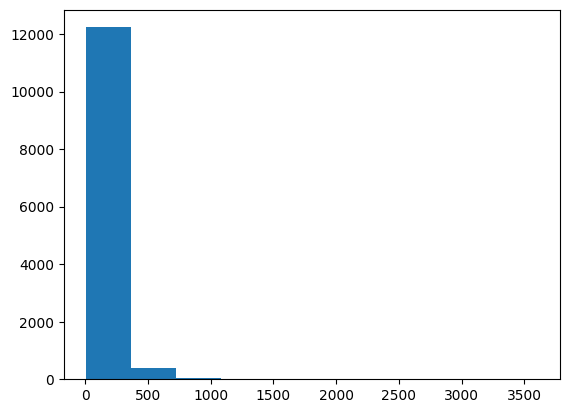

In [ ]:
plt.hist(df["price"])
plt.show()

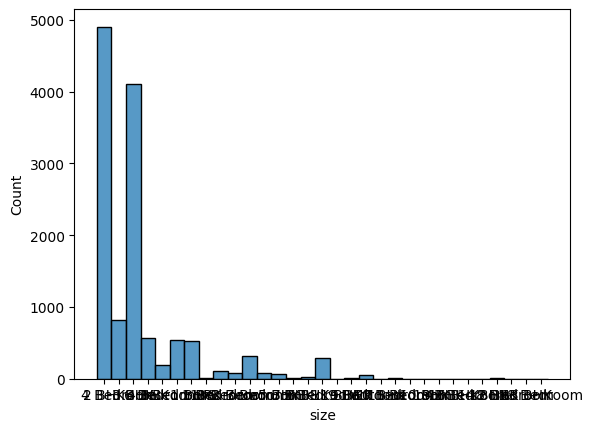

In [ ]:
sns.histplot(df["size"])
plt.show()

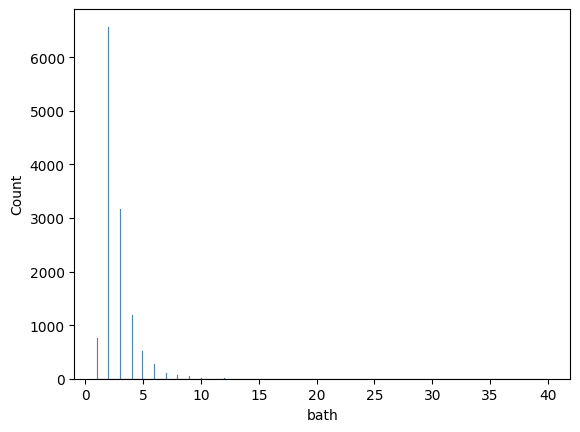

In [ ]:
sns.histplot(df["bath"])
plt.show()

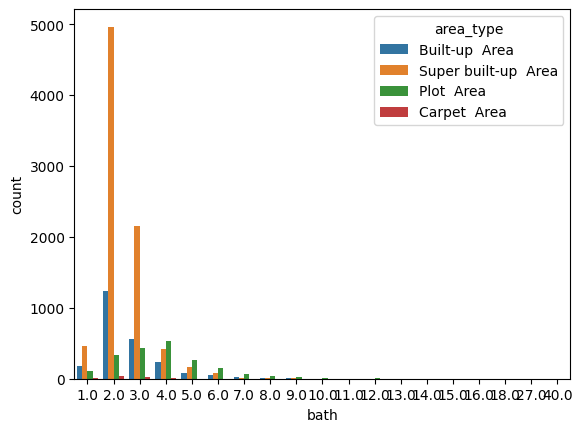

In [ ]:
sns.countplot(data=df,x="bath",hue="area_type")
plt.show()

## 6.Correlation Analysis in EDA

In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12734 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12734 non-null  object 
 1   availability  12734 non-null  object 
 2   location      12734 non-null  object 
 3   size          12734 non-null  object 
 4   total_sqft    12734 non-null  object 
 5   bath          12734 non-null  float64
 6   balcony       12734 non-null  float64
 7   price         12734 non-null  float64
dtypes: float64(3), object(5)
memory usage: 895.4+ KB


In [ ]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df.groupby("area_type")["price"].mean()

,price
area_type,
Built-up Area,104.853679
Carpet Area,89.502356
Plot Area,211.425550
Super built-up Area,94.475992


In [ ]:
df["area_type"] = (
    df["area_type"]
    .str.replace(r"\s+", " ", regex=True)  # replace multiple spaces with one
    .str.strip()                           # remove leading/trailing spaces
)


In [ ]:
df["area_type"].replace({
    "Carpet Area":1,
    "Built-up Area":2,
    "Super built-up Area":3,
    "Plot Area":4
}, inplace=True)

/tmp/ipython-input-2895970282.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["area_type"].replace({
/tmp/ipython-input-2895970282.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["area_type"].replace({


In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,4,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,3,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,3,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,2,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,3,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,2,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


In [ ]:
print(df["location"].unique())

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


In [ ]:
print(df["size"].unique())

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["location"]=le.fit_transform(df["location"])

In [ ]:
print(df["availability"].unique())

['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb'
 '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov'
 '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov'
 '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov' '20-Jul' '16-Sep' '15-Oct'
 '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan'
 '14-Jul']


In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,19-Dec,419,2 BHK,1056,2.0,1.0,39.07
1,4,Ready To Move,317,4 Bedroom,2600,5.0,3.0,120.00
2,2,Ready To Move,1178,3 BHK,1440,2.0,3.0,62.00
3,3,Ready To Move,756,3 BHK,1521,3.0,1.0,95.00
4,3,Ready To Move,715,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,3,Ready To Move,474,3 BHK,1715,3.0,3.0,112.00
13315,2,Ready To Move,1251,5 Bedroom,3453,4.0,0.0,231.00
13316,3,Ready To Move,1003,4 BHK,3600,5.0,2.0,400.00
13317,2,Ready To Move,971,2 BHK,1141,2.0,1.0,60.00


In [ ]:
df["availability"].value_counts()

,count
availability,
Ready To Move,10138
18-May,290
18-Dec,283
18-Apr,269
18-Aug,187
...,...
16-Oct,1
17-Jan,1
16-Nov,1


In [ ]:
df["availability"] = pd.to_datetime(df["availability"],format="%d-%b",errors="coerce")

In [ ]:
df["availability"].fillna(df["availability"].median(),inplace=True)

/tmp/ipython-input-319720832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["availability"].fillna(df["availability"].median(),inplace=True)


In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,1900-12-19,419,2 BHK,1056,2.0,1.0,39.07
1,4,1900-07-18,317,4 Bedroom,2600,5.0,3.0,120.00
2,2,1900-07-18,1178,3 BHK,1440,2.0,3.0,62.00
3,3,1900-07-18,756,3 BHK,1521,3.0,1.0,95.00
4,3,1900-07-18,715,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,3,1900-07-18,474,3 BHK,1715,3.0,3.0,112.00
13315,2,1900-07-18,1251,5 Bedroom,3453,4.0,0.0,231.00
13316,3,1900-07-18,1003,4 BHK,3600,5.0,2.0,400.00
13317,2,1900-07-18,971,2 BHK,1141,2.0,1.0,60.00


In [ ]:
df["year"]=df["availability"].dt.year
df["month"]=df["availability"].dt.month
df["day"]=df["availability"].dt.day


In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,year,month,day
0,3,1900-12-19,419,2 BHK,1056,2.0,1.0,39.07,1900,12,19
1,4,1900-07-18,317,4 Bedroom,2600,5.0,3.0,120.00,1900,7,18
2,2,1900-07-18,1178,3 BHK,1440,2.0,3.0,62.00,1900,7,18
3,3,1900-07-18,756,3 BHK,1521,3.0,1.0,95.00,1900,7,18
4,3,1900-07-18,715,2 BHK,1200,2.0,1.0,51.00,1900,7,18


In [ ]:
df.drop(["availability","year"],axis=1,inplace=True)

In [ ]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,month,day
0,3,419,2 BHK,1056,2.0,1.0,39.07,12,19
1,4,317,4 Bedroom,2600,5.0,3.0,120.00,7,18
2,2,1178,3 BHK,1440,2.0,3.0,62.00,7,18
3,3,756,3 BHK,1521,3.0,1.0,95.00,7,18
4,3,715,2 BHK,1200,2.0,1.0,51.00,7,18


In [ ]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
import pandas as pd

def split_features(value):
  if "BHK" in value:

    bedroom = int(value.split()[0])
    hall = 1
    kitchen = 1
  elif "Bedroom" in value:

    bedroom = int(value.split()[0])
    hall = 0
    kitchen = 0
  elif value == '1 RK':
    bedroom = 1
    hall = 0
    kitchen = 0
  else:
    bedroom = None
    hall = None
    kitchen = None
  return bedroom, hall, kitchen
df[["Bedroom","Hall","Kitchen"]] = df["size"].apply(lambda x: pd.Series(split_features(x)))

df

,area_type,location,size,total_sqft,bath,balcony,price,month,day,Bedroom,Hall,Kitchen
0,3,419,2 BHK,1056,2.0,1.0,39.07,12,19,2,1,1
1,4,317,4 Bedroom,2600,5.0,3.0,120.00,7,18,4,0,0
2,2,1178,3 BHK,1440,2.0,3.0,62.00,7,18,3,1,1
3,3,756,3 BHK,1521,3.0,1.0,95.00,7,18,3,1,1
4,3,715,2 BHK,1200,2.0,1.0,51.00,7,18,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13314,3,474,3 BHK,1715,3.0,3.0,112.00,7,18,3,1,1
13315,2,1251,5 Bedroom,3453,4.0,0.0,231.00,7,18,5,0,0
13316,3,1003,4 BHK,3600,5.0,2.0,400.00,7,18,4,1,1
13317,2,971,2 BHK,1141,2.0,1.0,60.00,7,18,2,1,1


In [ ]:
df.drop(["size"],axis=1,inplace=True)

In [ ]:
df

,area_type,location,total_sqft,bath,balcony,price,month,day,Bedroom,Hall,Kitchen
0,3,419,1056,2.0,1.0,39.07,12,19,2,1,1
1,4,317,2600,5.0,3.0,120.00,7,18,4,0,0
2,2,1178,1440,2.0,3.0,62.00,7,18,3,1,1
3,3,756,1521,3.0,1.0,95.00,7,18,3,1,1
4,3,715,1200,2.0,1.0,51.00,7,18,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
13314,3,474,1715,3.0,3.0,112.00,7,18,3,1,1
13315,2,1251,3453,4.0,0.0,231.00,7,18,5,0,0
13316,3,1003,3600,5.0,2.0,400.00,7,18,4,1,1
13317,2,971,1141,2.0,1.0,60.00,7,18,2,1,1


In [ ]:
df.isnull().sum()

,0
area_type,0
location,0
total_sqft,0
bath,0
balcony,0
price,0
month,0
day,0
Bedroom,0
Hall,0


In [ ]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,month,day,Bedroom,Hall,Kitchen
0,3,419,1056,2.0,1.0,39.07,12,19,2,1,1
1,4,317,2600,5.0,3.0,120.00,7,18,4,0,0
2,2,1178,1440,2.0,3.0,62.00,7,18,3,1,1
3,3,756,1521,3.0,1.0,95.00,7,18,3,1,1
4,3,715,1200,2.0,1.0,51.00,7,18,2,1,1


In [ ]:
df.tail()

,area_type,location,total_sqft,bath,balcony,price,month,day,Bedroom,Hall,Kitchen
13314,3,474,1715,3.0,3.0,112.0,7,18,3,1,1
13315,2,1251,3453,4.0,0.0,231.0,7,18,5,0,0
13316,3,1003,3600,5.0,2.0,400.0,7,18,4,1,1
13317,2,971,1141,2.0,1.0,60.0,7,18,2,1,1
13318,3,906,4689,4.0,1.0,488.0,6,18,4,1,1


In [ ]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12734 entries, 0 to 13318
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12734 non-null  int64  
 1   location    12734 non-null  int64  
 2   total_sqft  12734 non-null  object 
 3   bath        12734 non-null  float64
 4   balcony     12734 non-null  float64
 5   price       12734 non-null  float64
 6   month       12734 non-null  int32  
 7   day         12734 non-null  int32  
 8   Bedroom     12734 non-null  int64  
 9   Hall        12734 non-null  int64  
 10  Kitchen     12734 non-null  int64  
dtypes: float64(3), int32(2), int64(5), object(1)
memory usage: 1.1+ MB


In [ ]:
df["total_sqft"]=pd.to_numeric(df["total_sqft"],errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12734 entries, 0 to 13318
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12734 non-null  int64  
 1   location    12734 non-null  int64  
 2   total_sqft  12496 non-null  float64
 3   bath        12734 non-null  float64
 4   balcony     12734 non-null  float64
 5   price       12734 non-null  float64
 6   month       12734 non-null  int32  
 7   day         12734 non-null  int32  
 8   Bedroom     12734 non-null  int64  
 9   Hall        12734 non-null  int64  
 10  Kitchen     12734 non-null  int64  
dtypes: float64(4), int32(2), int64(5)
memory usage: 1.1 MB


In [ ]:
df.isnull().sum()

,0
area_type,0
location,0
total_sqft,238
bath,0
balcony,0
price,0
month,0
day,0
Bedroom,0
Hall,0


<Axes: >

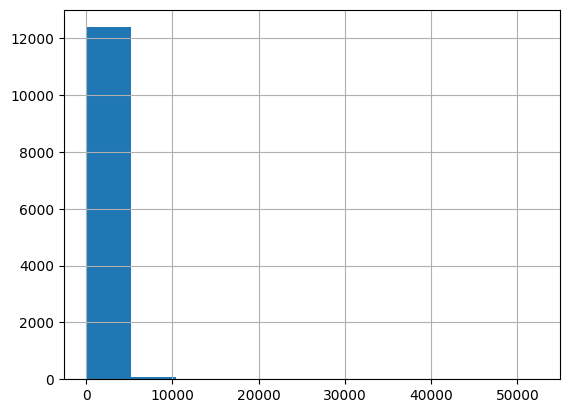

In [ ]:
df["total_sqft"].hist()

In [ ]:
df["total_sqft"].fillna(df["total_sqft"].median(),inplace=True)

/tmp/ipython-input-3681608186.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_sqft"].fillna(df["total_sqft"].median(),inplace=True)


## Correlation

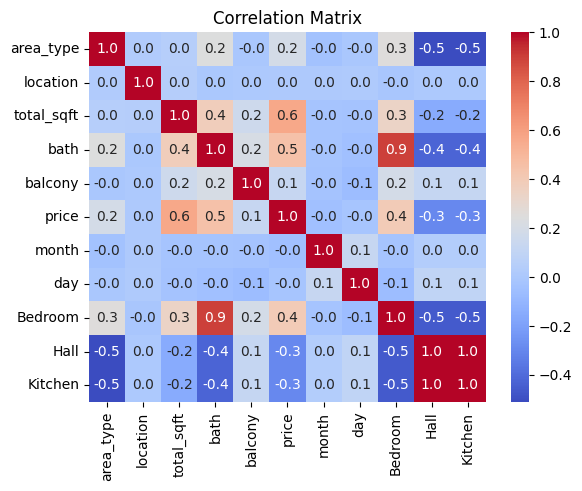

In [ ]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm') # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop(["area_type","Hall","Bedroom"],axis=1,inplace=True)

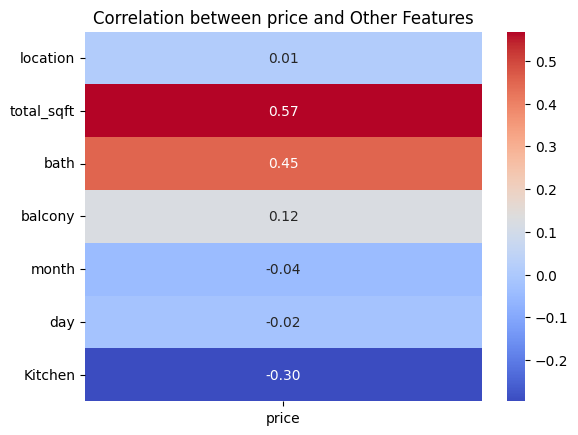

In [ ]:
price_corr = df.corr()['price']

price_corr = price_corr.drop('price')


sns.heatmap(price_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})
plt.title('Correlation between price and Other Features')
plt.show()

In [ ]:
df.drop(["location","month","day"],axis=1,inplace=True)

<Axes: >

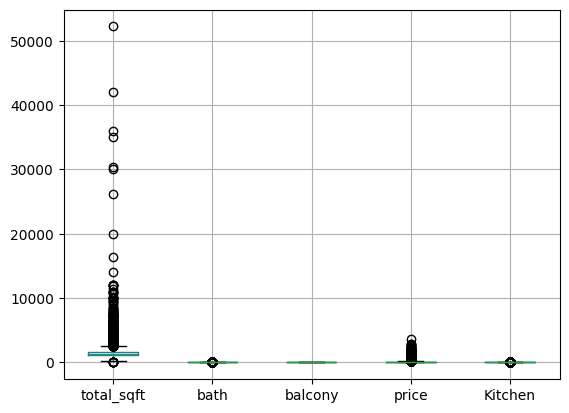

In [ ]:
df.boxplot()

In [ ]:
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:

        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, exclude_column='price')
df=df_cleaned

In [ ]:
df.shape

(9565, 5)

## Data Scaling

In [ ]:
df

,total_sqft,bath,balcony,price,Kitchen
0,1056.0,2.0,1.0,39.07,1
2,1440.0,2.0,3.0,62.00,1
3,1521.0,3.0,1.0,95.00,1
4,1200.0,2.0,1.0,51.00,1
5,1170.0,2.0,1.0,38.00,1
...,...,...,...,...,...
13309,1675.0,3.0,2.0,92.13,1
13310,1050.0,2.0,2.0,52.71,1
13312,1262.0,2.0,2.0,47.00,1
13314,1715.0,3.0,3.0,112.00,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features = ["total_sqft","bath","balcony","Kitchen"]
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[features])

scaled_df = pd.DataFrame(scaled_data, columns=features)

## After EDA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # Changed accuracy_score to r2_score
import pandas as pd

X=df[["total_sqft","bath","balcony","Kitchen"]]
y=df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred) # Changed accuracy calculation to r2_score
print(f'Baseline model R-squared: {r2:.2f}') # Updated print statement

Baseline model R-squared: 0.40
